In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/SepsisDataset/GSE27131_metadata.csv')
df


,database,submission_date,release_date,last_update_date,title,accession,type,source,organism,tissue,...,age,treatment_protocol,molecule,extract_protocol,label,label_protocol,hybridization_protocol,scan_protocol,data_processing,control
0,GEO,08-02-11,01-04-11,01-04-11,blood_day0_patient1,GSM670449,RNA,Blood,Homo sapiens,blood,...,54.000000,Blood samples were collected with PAXgene Bloo...,total RNA,RNA extraction was performed with PAXgene Bloo...,biotin,Isolated total RNA was used with GeneChip WT c...,Fragmented and labeled DNA (2500ng) was used i...,Fluorescent images were captured using gene Ar...,Raw data were processed using Partek Genomics ...,NaN
1,GEO,08-02-11,01-04-11,01-04-11,blood_day6_patient1,GSM670450,RNA,Blood,Homo sapiens,blood,...,54.000000,Blood samples were collected with PAXgene Bloo...,total RNA,RNA extraction was performed with PAXgene Bloo...,biotin,Isolated total RNA was used with GeneChip WT c...,Fragmented and labeled DNA (2500ng) was used i...,Fluorescent images were captured using gene Ar...,Raw data were processed using Partek Genomics ...,NaN
2,GEO,08-02-11,01-04-11,01-04-11,blood_day0_patient2,GSM670451,RNA,Blood,Homo sapiens,blood,...,38.000000,Blood samples were collected with PAXgene Bloo...,total RNA,RNA extraction was performed with PAXgene Bloo...,biotin,Isolated total RNA was used with GeneChip WT c...,Fragmented and labeled DNA (2500ng) was used i...,Fluorescent images were captured using gene Ar...,Raw data were processed using Partek Genomics ...,NaN
3,GEO,08-02-11,01-04-11,01-04-11,blood_day6_patient2,GSM670452,RNA,Blood,Homo sapiens,blood,...,38.000000,Blood samples were collected with PAXgene Bloo...,total RNA,RNA extraction was performed with PAXgene Bloo...,biotin,Isolated total RNA was used with GeneChip WT c...,Fragmented and labeled DNA (2500ng) was used i...,Fluorescent images were captured using gene Ar...,Raw data were processed using Partek Genomics ...,NaN
4,GEO,08-02-11,01-04-11,01-04-11,blood_day0_patient3,GSM670453,RNA,Blood,Homo sapiens,blood,...,59.000000,Blood samples were collected with PAXgene Bloo...,total RNA,RNA extraction was performed with PAXgene Bloo...,biotin,Isolated total RNA was used with GeneChip WT c...,Fragmented and labeled DNA (2500ng) was used i...,Fluorescent images were captured using gene Ar...,Raw data were processed using Partek Genomics ...,NaN
5,GEO,08-02-11,01-04-11,01-04-11,blood_day6_patient3,GSM670454,RNA,Blood,Homo sapiens,blood,...,59.000000,Blood samples were collected with PAXgene Bloo...,total RNA,RNA extraction was performed with PAXgene Bloo...,biotin,Isolated total RNA was used with GeneChip WT c...,Fragmented and labeled DNA (2500ng) was used i...,Fluorescent images were captured using gene Ar...,Raw data were processed using Partek Genomics ...,NaN
6,GEO,08-02-11,01-04-11,01-04-11,blood_day0_patient4,GSM670455,RNA,Blood,Homo sapiens,blood,...,28.000000,Blood samples were collected with PAXgene Bloo...,total RNA,RNA extraction was performed with PAXgene Bloo...,biotin,Isolated total RNA was used with GeneChip WT c...,Fragmented and labeled DNA (2500ng) was used i...,Fluorescent images were captured using gene Ar...,Raw data were processed using Partek Genomics ...,NaN
7,GEO,08-02-11,01-04-11,01-04-11,blood_day6_patient4,GSM670456,RNA,Blood,Homo sapiens,blood,...,28.000000,Blood samples were collected with PAXgene Bloo...,total RNA,RNA extraction was performed with PAXgene Bloo...,biotin,Isolated total RNA was used with GeneChip WT c...,Fragmented and labeled DNA (2500ng) was used i...,Fluorescent images were captured using gene Ar...,Raw data were processed using Partek Genomics ...,NaN
8,GEO,08-02-11,01-04-11,01-04-11,blood_day0_patient5,GSM670457,RNA,Blood,Homo sapiens,blood,...,38.000000,Blood samples were collected with PAXgene Bloo...,total RNA,RNA extraction was performed with PAXgene Bloo...,biotin,Isolated total RNA was used with GeneChip WT c...,Fragmented and labeled DNA (2500ng) was used i...,Fluorescent images were ca

In [4]:
for col in df.columns:
    print(col)

database
submission_date
release_date
last_update_date
title
accession
type
source
organism
tissue
patient
gender
age
treatment_protocol
molecule
extract_protocol
label
label_protocol
hybridization_protocol
scan_protocol
data_processing
control


# **Data Cleaning**

In [6]:
df1= df.drop(columns=['database', 'submission_date',	'release_date', 'last_update_date', 'treatment_protocol', 'extract_protocol','label', 'label_protocol',	'hybridization_protocol',	'scan_protocol', 'data_processing'])
df1=df1.drop([21, 22, 23])
df1=df1.dropna(how='all')
df1

,title,accession,type,source,organism,tissue,patient,gender,age,molecule,control
0,blood_day0_patient1,GSM670449,RNA,Blood,Homo sapiens,blood,1.0,male,54.0,total RNA,NaN
1,blood_day6_patient1,GSM670450,RNA,Blood,Homo sapiens,blood,1.0,male,54.0,total RNA,NaN
2,blood_day0_patient2,GSM670451,RNA,Blood,Homo sapiens,blood,2.0,male,38.0,total RNA,NaN
3,blood_day6_patient2,GSM670452,RNA,Blood,Homo sapiens,blood,2.0,male,38.0,total RNA,NaN
4,blood_day0_patient3,GSM670453,RNA,Blood,Homo sapiens,blood,3.0,male,59.0,total RNA,NaN
5,blood_day6_patient3,GSM670454,RNA,Blood,Homo sapiens,blood,3.0,male,59.0,total RNA,NaN
6,blood_day0_patient4,GSM670455,RNA,Blood,Homo sapiens,blood,4.0,female,28.0,total RNA,NaN
7,blood_day6_patient4,GSM670456,RNA,Blood,Homo sapiens,blood,4.0,female,28.0,total RNA,NaN
8,blood_day0_patient5,GSM670457,RNA,Blood,Homo sapiens,blood,5.0,male,38.0,total RNA,NaN
9,blood_day6_patient5,GSM670458,RNA,Blood,Homo sapiens,blood,5.0,male,38.0,total RNA,NaN


In [9]:
df1.loc [(df1['age'] >= 18) & (df1['age'] <= 35) , 'Age']= 'Young'
df1.loc [(df1['age'] >= 36) & (df1['age'] <= 64) , 'Age']= 'Middle'
df1.loc [(df1['age'] >= 65) , 'Age']= 'Elderly'
df1.loc [(df1['patient'] >= 0) , 'Disease status']= 'Infected'
df1.loc [(df1['control'] >= 0) , 'Disease status']= 'Control'
df1

,title,accession,type,source,organism,tissue,patient,gender,age,molecule,control,Age,Disease status
0,blood_day0_patient1,GSM670449,RNA,Blood,Homo sapiens,blood,1.0,male,54.0,total RNA,NaN,Middle,Infected
1,blood_day6_patient1,GSM670450,RNA,Blood,Homo sapiens,blood,1.0,male,54.0,total RNA,NaN,Middle,Infected
2,blood_day0_patient2,GSM670451,RNA,Blood,Homo sapiens,blood,2.0,male,38.0,total RNA,NaN,Middle,Infected
3,blood_day6_patient2,GSM670452,RNA,Blood,Homo sapiens,blood,2.0,male,38.0,total RNA,NaN,Middle,Infected
4,blood_day0_patient3,GSM670453,RNA,Blood,Homo sapiens,blood,3.0,male,59.0,total RNA,NaN,Middle,Infected
5,blood_day6_patient3,GSM670454,RNA,Blood,Homo sapiens,blood,3.0,male,59.0,total RNA,NaN,Middle,Infected
6,blood_day0_patient4,GSM670455,RNA,Blood,Homo sapiens,blood,4.0,female,28.0,total RNA,NaN,Young,Infected
7,blood_day6_patient4,GSM670456,RNA,Blood,Homo sapiens,blood,4.0,female,28.0,total RNA,NaN,Young,Infected
8,blood_day0_patient5,GSM670457,RNA,Blood,Homo sapiens,blood,5.0,male,38.0,total RNA,NaN,Middle,Infected
9,blood_day6_patient5,GSM670458,RNA,Blood,Homo sapiens,blood,5.0,male,38.0,total RNA,NaN,Middle,Infected


# **Data Visualization**




In [15]:
df2 = df1.groupby(['Age', 'Disease status']).size().reset_index()
df2= df2.rename(columns={0:'Patient Count'})
df2

,Age,Disease status,Patient Count
0,Middle,Control,5
1,Middle,Infected,10
2,Young,Control,2
3,Young,Infected,4


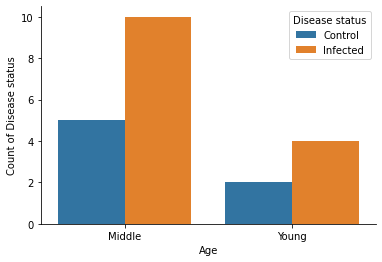

In [16]:
axes1=sns.barplot(data=df2,x='Age',y='Patient Count', hue='Disease status')
axes1.set(xlabel='Age', ylabel='Count of Disease status')
sns.despine()

In [19]:
df3 = df1.groupby(['Disease status', 'gender']).size().reset_index()
df3= df3.rename(columns={0:'Gender Count'})
df3

,Disease status,gender,Gender Count
0,Control,female,3
1,Control,male,4
2,Infected,female,2
3,Infected,male,12


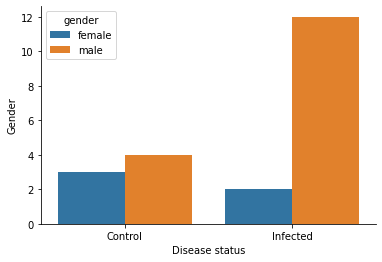

In [20]:
axes2=sns.barplot(data=df3,x='Disease status',y='Gender Count', hue='gender')
axes2.set(xlabel='Disease status', ylabel='Gender')
sns.despine()

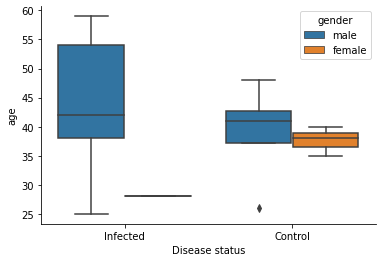

In [42]:
axes3=sns.boxplot(data=df1, x='Disease status', y='age', hue='gender')
sns.despine()

In [43]:
df4 = df1.groupby(['Age', 'Disease status','gender']).size().reset_index()
df4= df4.rename(columns={0:'Disease status Count'})

df4

,Age,Disease status,gender,Disease status Count
0,Middle,Control,female,2
1,Middle,Control,male,3
2,Middle,Infected,male,10
3,Young,Control,female,1
4,Young,Control,male,1
5,Young,Infected,female,2
6,Young,Infected,male,2


In [ ]:
axes3=sns.boxplot(data=df1, x='Disease status', y='Disease status Count', hue='gender')
sns.despine()

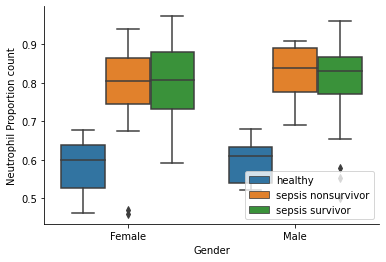

In [ ]:
axes3=sns.boxplot(data=df1,x='Gender',y='neutrophil proportion', hue='disease status')
axes3.set(xlabel='Gender', ylabel='Neutrophil Proportion count')
plt.legend(loc='lower right')
sns.despine()

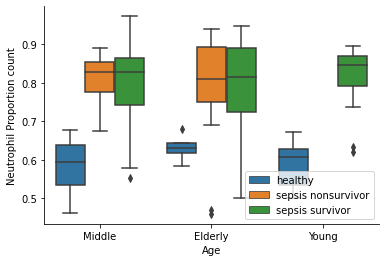

In [ ]:
axes3=sns.boxplot(data=df1,x='Age',y='neutrophil proportion', hue='disease status')
axes3.set(xlabel='Age', ylabel='Neutrophil Proportion count')
plt.legend(loc='lower right')
sns.despine()

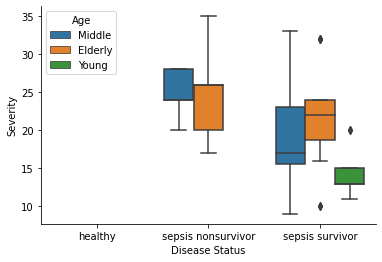

In [ ]:
axes4=sns.boxplot(data=df1,x='disease status',y='severity (apacheii)', hue='Age')
axes4.set(xlabel='Disease Status', ylabel='Severity')
sns.despine()

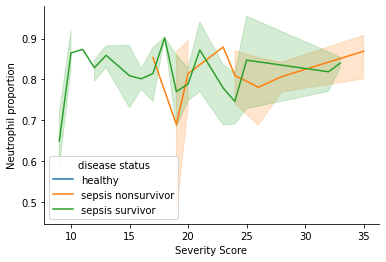

In [ ]:
axes5=sns.lineplot(data=df1,x='severity (apacheii)',y='neutrophil proportion', hue='disease status')
axes5.set(xlabel='Severity Score', ylabel='Neutrophil proportion')

sns.despine()